# **Analisis de TC histórico**

In [1]:
# pip install pandas_datareader

In [2]:
# pip install yfinance

In [3]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from datetime import datetime
from forex_python.converter import CurrencyRates
import yfinance as yf


**Descarga de los datos de Tipo de Cambio.**


In [4]:
start_date = dt.datetime.today()- dt.timedelta(10000) 
end_date = dt.datetime.today()
stock ="USDMXN=X"
data = yf.download(stock, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.1776,11.4250,11.1776,11.358,11.358,0
2003-12-02,11.3605,11.3800,11.2740,11.290,11.290,0
2003-12-03,11.3605,11.3605,11.1860,11.245,11.245,0
2003-12-04,11.3550,11.3550,11.1590,11.188,11.188,0
2003-12-05,11.1860,11.2400,11.1230,11.197,11.197,0


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-04,19.335501,19.389910,19.110979,19.335501,19.335501,0
2024-10-08,19.289671,19.442280,19.222401,19.289671,19.289671,0
2024-10-09,19.345400,19.442659,19.305901,19.345400,19.345400,0
2024-10-10,19.467449,19.610279,19.429230,19.467449,19.467449,0
2024-10-11,19.438400,19.487249,19.375891,19.438400,19.438400,0


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.0
mean,15.303506,15.389767,15.222913,15.304287,15.304287,0.0
std,3.731482,3.760718,3.709506,3.731272,3.731272,0.0
min,9.866500,9.933700,9.834000,9.866500,9.866500,0.0
25%,11.971000,12.020875,11.923700,11.974000,11.974000,0.0
50%,13.676250,13.796100,13.559805,13.690700,13.690700,0.0
75%,18.934718,19.036368,18.839999,18.933798,18.933798,0.0
max,25.315100,25.765341,24.728029,25.336201,25.336201,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5436 entries, 2003-12-01 to 2024-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5436 non-null   float64
 1   High       5436 non-null   float64
 2   Low        5436 non-null   float64
 3   Close      5436 non-null   float64
 4   Adj Close  5436 non-null   float64
 5   Volume     5436 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 297.3 KB



Disponemos de informacion desde 2003-12-01 (diciembre 2003) al cierre del último día hábil. Esto representa un total de 5k registros para analizar el tipo de cambio. 

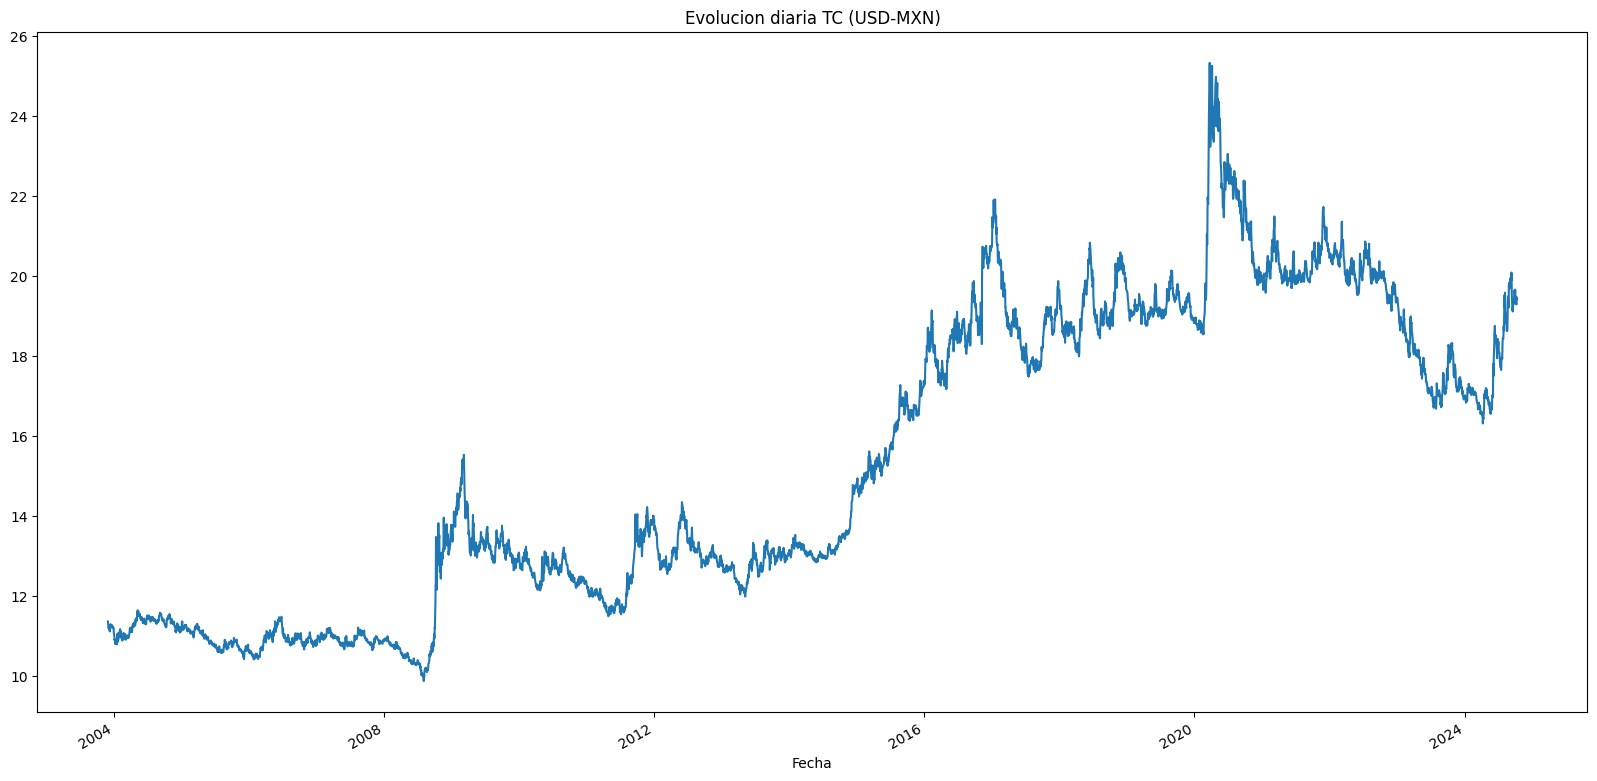

In [9]:
## Procedemos a graficar la informacion dispobible para analizar la completitud de la data. 

plt.figure(figsize=(20,10))
data['Adj Close'].plot()
plt.title('Evolucion diaria TC (USD-MXN)')
plt.xlabel('Fecha')
plt.show()


In [10]:
data['Adj Close'][-1]/data['Adj Close'][0]-1


C:\Users\MI26314\AppData\Local\Temp\ipykernel_13816\1940461441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Adj Close'][-1]/data['Adj Close'][0]-1


np.float64(0.7114281218560359)

Observando de forma preliminar la grárica, podemos apreciar una evolución incremental constante del tipo de cambio. Respecto a la primera observación  la última, apreciamos un aumento de 73% en el tipo de cambio nominal. (diciembre 2003 vs oct 2024). 

Para complementar el análisis, analizaremos a la par informacion de inflacion, PIB y diversas variables macro economicas de interes. 


In [11]:
inpc = pd.read_csv('data/INPC_BASE_2018.csv')
inpc.head()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1,1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
2,1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
3,1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
4,1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [12]:
inpc.tail()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
51,2020,106.447,106.889,106.838,105.755,106.162,106.743,107.444,107.867,108.114,108.774,108.856,109.271
52,2021,110.210,110.907,111.824,112.190,112.419,113.018,113.682,113.899,114.601,115.561,116.884,117.308
53,2022,118.002,118.981,120.159,120.809,121.022,122.044,122.948,123.803,124.571,125.276,125.997,126.478
54,2023,127.336,128.046,128.389,128.363,128.084,128.214,128.832,129.545,130.120,130.609,131.445,132.373
55,2024,133.555,133.681,134.065,134.336,134.087,134.594,136.003,136.013,NaN,NaN,NaN,NaN


La base descargada contiene los valores del INPC (indexados a 2018) desde 1969 hasta agosto 2024.Con esta data podemos proceder a analizar la evolucion mensual de la inflacion. 

In [13]:
# Indenxaremos los valores para poder acceder a ellos de for iterativa.
inpc.set_index('ANO', inplace=True)
inpc.head()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [14]:
inpc.tail(25)

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
2000,44.930830,45.329380,45.580681,45.840018,46.011379,46.283920,46.464466,46.719785,47.061072,47.385136,47.790288,48.307671
2001,48.575476,48.543328,48.850888,49.097309,49.209970,49.326364,49.198202,49.489688,49.950381,50.176135,50.365149,50.434899
2002,50.900472,50.867750,51.127948,51.407235,51.511429,51.762586,51.911181,52.108560,52.421984,52.653036,53.078877,53.309930
2003,53.525441,53.674122,54.012930,54.105144,53.930560,53.975112,54.053339,54.215490,54.538238,54.738207,55.192542,55.429811
2004,55.774317,56.107945,56.298071,56.383032,56.241603,56.331745,56.479390,56.828041,57.297917,57.694747,58.186899,58.307088
2005,58.309160,58.503431,58.767121,58.976415,58.828251,58.771783,59.001800,59.072255,59.309006,59.454580,59.882493,60.250312
2006,60.603626,60.696358,60.772512,60.861617,60.590675,60.642998,60.809294,61.119609,61.736612,62.006519,62.331857,62.692424
2007,63.016208,63.192347,63.329113,63.291295,62.982534,63.058170,63.326005,63.583996,64.077703,64.327405,64.781221,65.049056
2008,65.350564,65.544834,66.019891,66.170127,66.098635,66.372168,66.742059,67.127492,67.584935,68.045486,68.818942,69.295552


In [15]:
for c in inpc.columns:
    inpc[c] = inpc[c].astype(float)

In [16]:
# Con los valores indexados, podemos calcular la inflacion puntual de un mes vs otro. 
(inpc['FEB'][1969]/inpc['ENE'][1969] - 1)*100

np.float64(0.35895277554498506)

In [17]:
# De igual forma, se pueden extraer los valores de inflacion anual
(inpc['ENE'][2023]/inpc['ENE'][2022] - 1)*100


np.float64(7.910035423128425)

## **Transformacion de los datos**

1. Será necesario procesar la data que tenemos del INPC para poder extraer la tasa mensual de inflación.
2. Si queremos agregar variables complementrias al análisis, será necesario procesar la serie de TC, para que ésta la tengamos de forma mensual. Podemos tener diversos abordajes: 
    * Tomar el valor promedio mensual de la serie.
    * Tomar el valor máximo observado de la serie.
    * Tomar la varianza mensual de la serie para estimar volatilidad...

In [18]:
## Generamos un diccionario con los valores mensuales de inflacion con base en la data de inpc.

year = 2004

# Creamos diccionario vacio
inpc_ann  = defaultdict()
stop = False 


for y_act in range (year, 2025):
    
    if stop:
        break

    for index,month in enumerate(inpc.columns):

        # Detenemos el proceso si no se encuentra el valor del año/mes
        if pd.isnull(inpc[month][y_act]) == True:
            stop = True
            break

        # Creamos una llave para el diccionario inpc_ann
        if index<9: 
            key = str(y_act) +'-0'+ str(np.sum(index+1))+'-01'
        else: 
            key = str(y_act) +'-'+ str(np.sum(index+1))+'-01'

        # Llenamos el diccionario
        inpc_ann[key] = (inpc[month][y_act]/inpc[month][(y_act-1)]-1)*100



In [19]:
inpc_ann

defaultdict(None,
            {'2004-01-01': np.float64(4.201509864150066),
             '2004-02-01': np.float64(4.534442667911764),
             '2004-03-01': np.float64(4.230728665625083),
             '2004-04-01': np.float64(4.210113074608546),
             '2004-05-01': np.float64(4.285220261278999),
             '2004-06-01': np.float64(4.366145812787603),
             '2004-07-01': np.float64(4.488254635786282),
             '2004-08-01': np.float64(4.818828114136653),
             '2004-09-01': np.float64(5.060080749040474),
             '2004-10-01': np.float64(5.401236030502754),
             '2004-11-01': np.float64(5.425294256529534),
             '2004-12-01': np.float64(5.1908482439184),
             '2005-01-01': np.float64(4.544821237511765),
             '2005-02-01': np.float64(4.26942430389603),
             '2005-03-01': np.float64(4.385674320229205),
             '2005-04-01': np.float64(4.599581026965316),
             '2005-05-01': np.float64(4.599172827203213),

In [20]:
inf_mx = pd.DataFrame.from_dict(inpc_ann, orient = 'index')
inf_mx.columns = ['ANN_INF']
inf_mx

,ANN_INF
2004-01-01,4.201510
2004-02-01,4.534443
2004-03-01,4.230729
2004-04-01,4.210113
2004-05-01,4.285220
...,...
2024-04-01,4.653210
2024-05-01,4.686768
2024-06-01,4.976056
2024-07-01,5.566164


**Extraemos los datos de inflacion de US**

In [21]:
cpi = pd.read_csv("data/CPI_ANNUAL.csv")
cpi.head()

,MONTH,All_items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
0,2004-09-01,2.5,3.3,3.3,3.3,6.7,9.6,1.6,6.2,2.0,-0.6,-0.7,-1.1,2.3,3.0,3.0,5.0,1.8
1,2004-10-01,3.2,3.4,3.5,3.3,15.2,26.6,0.9,8.0,2.0,0.1,-0.6,-0.4,2.6,2.8,2.7,5.1,1.4
2,2004-11-01,3.5,3.2,3.1,3.2,19.2,30.9,2.3,17.1,2.2,0.5,-0.1,0.3,2.7,2.8,2.7,5.0,1.7
3,2004-12-01,3.3,2.7,2.4,3.0,16.6,26.1,2.1,16.4,2.2,0.6,-0.2,0.6,2.2,2.8,2.7,4.9,1.5
4,2005-01-01,3.0,2.9,2.7,3.2,10.6,14.3,3.5,11.2,2.3,0.9,0.3,1.3,2.3,2.8,2.7,5.0,1.4


In [22]:
cpi.tail(15)

,MONTH,All_items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
226,2023-07-01,3.2,4.9,3.6,7.1,-12.5,-19.9,3.0,-13.7,4.7,0.8,3.2,3.5,4.1,6.1,7.7,-1.5,1.2
227,2023-08-01,3.7,4.3,3.0,6.5,-3.6,-3.3,2.1,-16.5,4.3,0.2,3.1,2.9,4.5,5.9,7.3,-2.1,1.0
228,2023-09-01,3.7,3.7,2.4,6.0,-0.5,3.0,2.6,-19.9,4.1,0.0,2.3,2.5,4.2,5.7,7.2,-2.6,1.0
229,2023-10-01,3.2,3.3,2.1,5.4,-4.5,-5.3,2.4,-15.8,4.0,0.1,2.6,1.9,4.7,5.5,6.7,-2.0,0.9
230,2023-11-01,3.1,2.9,1.7,5.3,-5.4,-8.9,3.4,-10.4,4.0,0.0,1.1,1.3,5.0,5.5,6.5,-0.9,-0.1
231,2023-12-01,3.4,2.7,1.3,5.2,-2.0,-1.9,3.3,-13.8,3.9,0.2,1.0,1.0,4.7,5.3,6.2,-0.5,-0.1
232,2024-01-01,3.1,2.6,1.2,5.1,-4.6,-6.4,3.8,-17.8,3.9,-0.3,0.1,0.7,3.0,5.4,6.0,0.6,0.0
233,2024-02-01,3.2,2.2,1.0,4.5,-1.9,-3.9,3.6,-8.8,3.8,-0.3,0.0,0.4,2.9,5.2,5.7,1.1,0.4
234,2024-03-01,3.5,2.2,1.2,4.2,2.1,1.3,5.0,-3.2,3.8,-0.7,0.4,-0.1,2.5,5.4,5.7,2.1,0.2
235,2024-04-01,3.4,2.2,1.1,4.1,2.6,1.2,5.1,-1.9,3.6,-1.3,1.3,-0.4,2.5,5.3,5.5,2.7,0.4


In [23]:
cpi.set_index('MONTH', inplace = True)

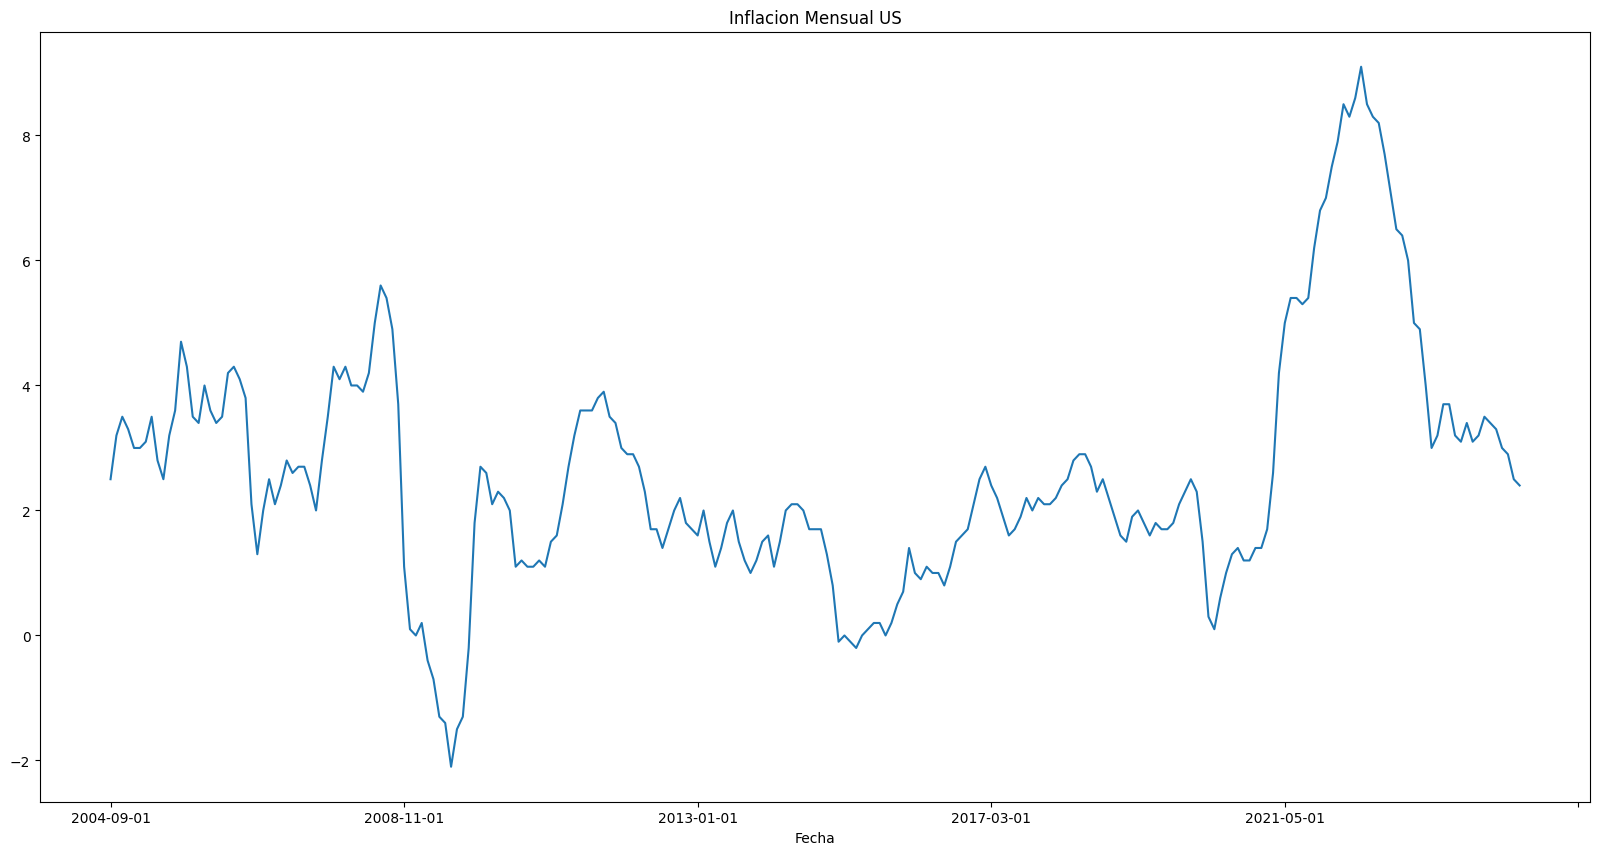

In [24]:
plt.figure(figsize=(20,10))
cpi['All_items'].plot()
plt.title('Inflacion Mensual US')
plt.xlabel('Fecha')
plt.show()

**Graficamos las inflaciones por pais**

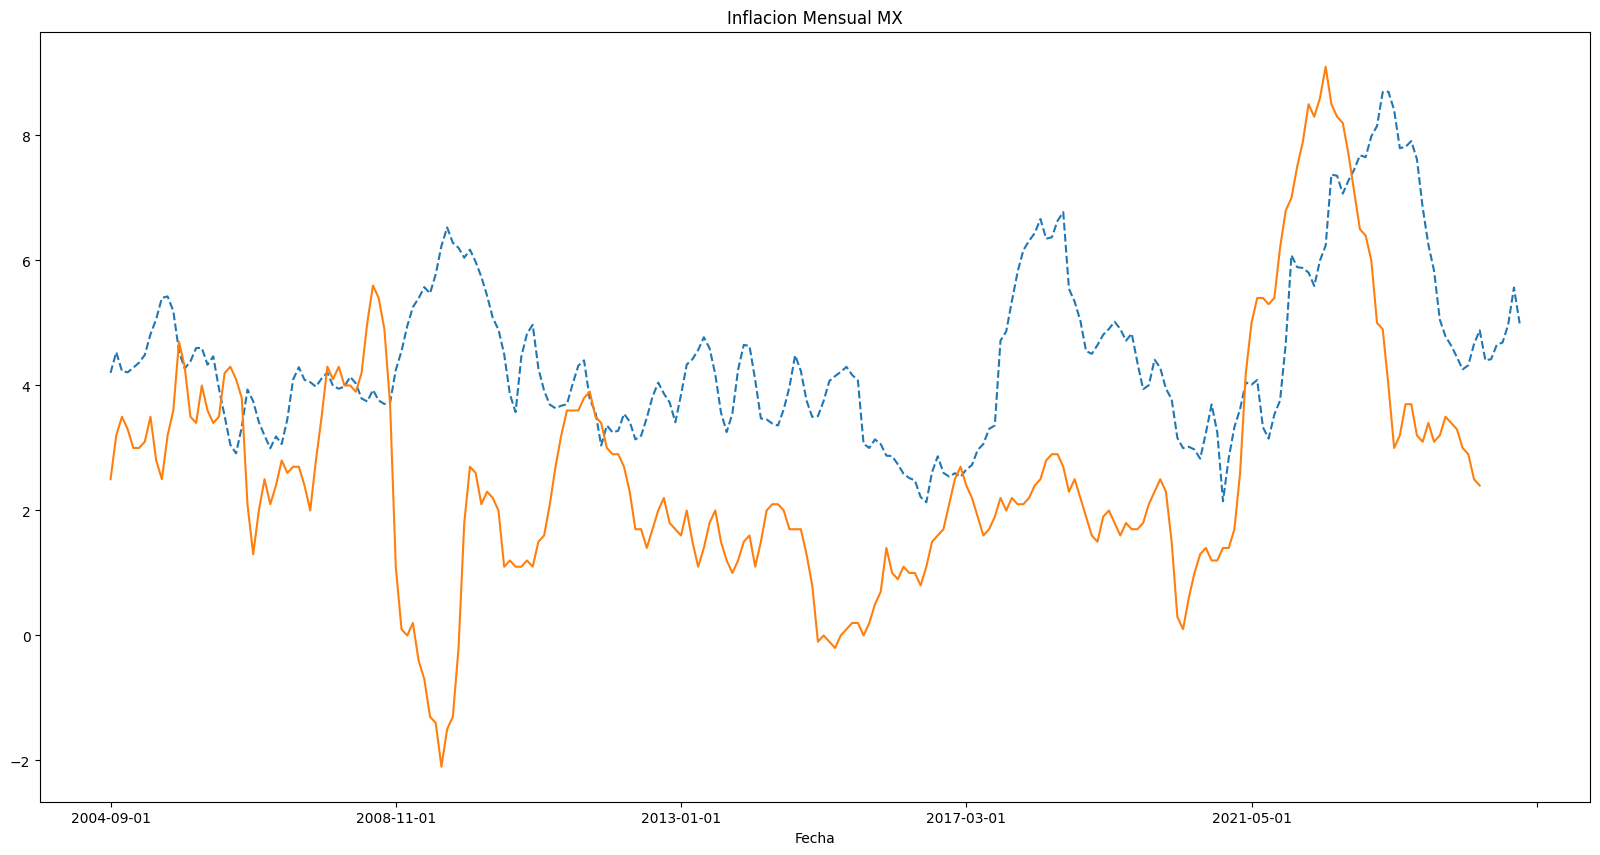

In [25]:
## Procedemos a graficar la informacion dispobible para analizar la completitud de la data. 

plt.figure(figsize=(20,10))
inf_mx['ANN_INF'].plot(style='--')
cpi['All_items'].plot()
plt.title('Inflacion Mensual MX')
plt.xlabel('Fecha')
plt.show()

In [26]:
## Generamos un nuevo DF que contenga la informaciión sobre inflacion mensual de cada uno de los países 
inf_cruz = pd.merge(inf_mx[['ANN_INF']],cpi[['All_items']],left_index=True, right_index=True, how = 'left' )
inf_cruz.columns = ['INF_MX', 'INF_EU']
inf_cruz.dropna(inplace = True)
inf_cruz.head()

,INF_MX,INF_EU
2004-09-01,5.060081,2.5
2004-10-01,5.401236,3.2
2004-11-01,5.425294,3.5
2004-12-01,5.190848,3.3
2005-01-01,4.544821,3.0


In [27]:
# Para mejor manipulacion de lsa fechas, convertimos el indice a un datetime
inf_cruz.index = pd.to_datetime(inf_cruz.index)


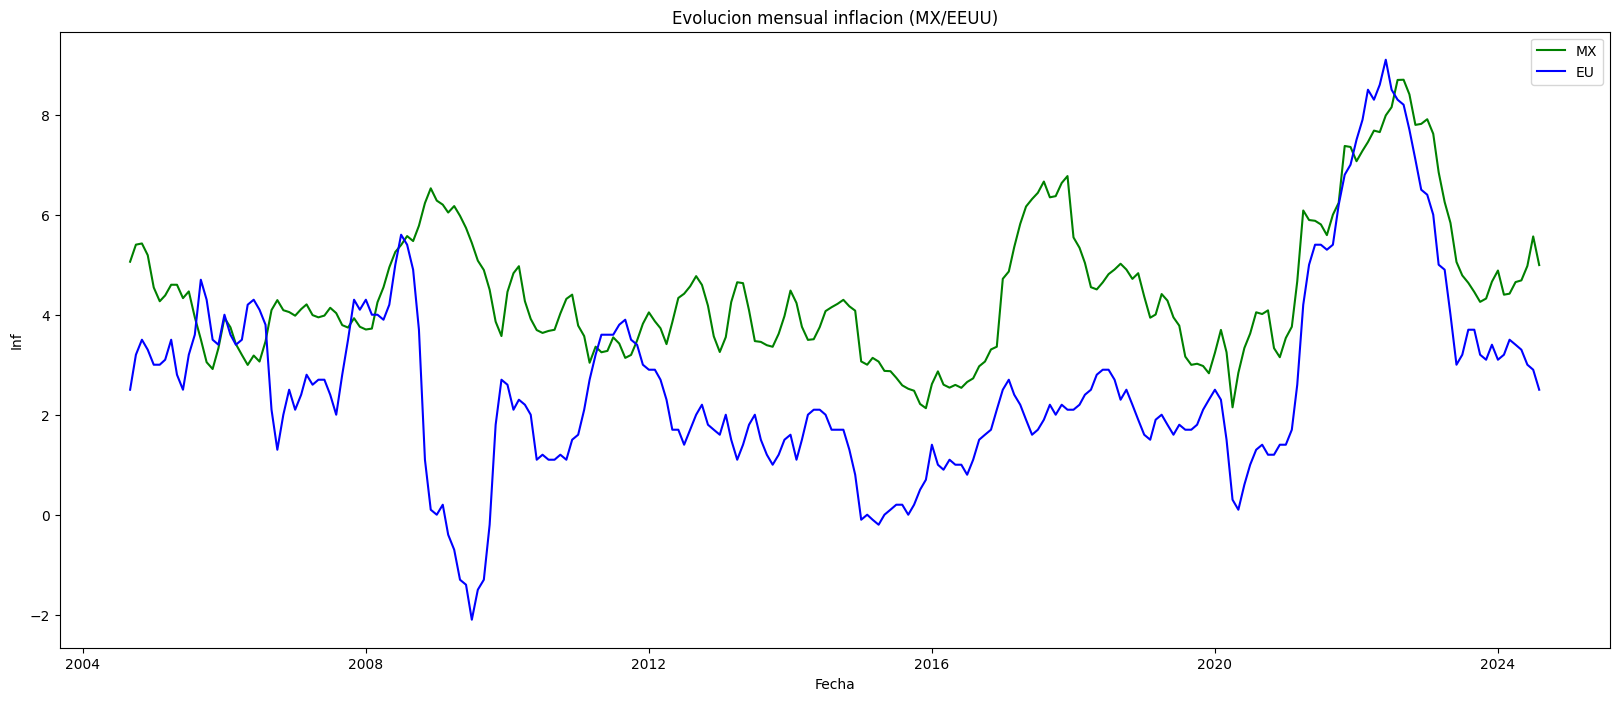

In [28]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'green')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.legend()
plt.show()

Observamos un periodo peculiar donde la inflación de EEUU estuvo por debajo de 0, lo resaltaremos en la gráfica para no perder de vista este detalle. 

In [29]:
inf_cruz[inf_cruz['INF_EU']<0]

,INF_MX,INF_EU
2009-03-01,6.043723,-0.4
2009-04-01,6.173274,-0.7
2009-05-01,5.978525,-1.3
2009-06-01,5.736118,-1.4
2009-07-01,5.436538,-2.1
2009-08-01,5.081960,-1.5
2009-09-01,4.894258,-1.3
2009-10-01,4.499498,-0.2
2015-01-01,3.065642,-0.1
2015-03-01,3.137075,-0.1


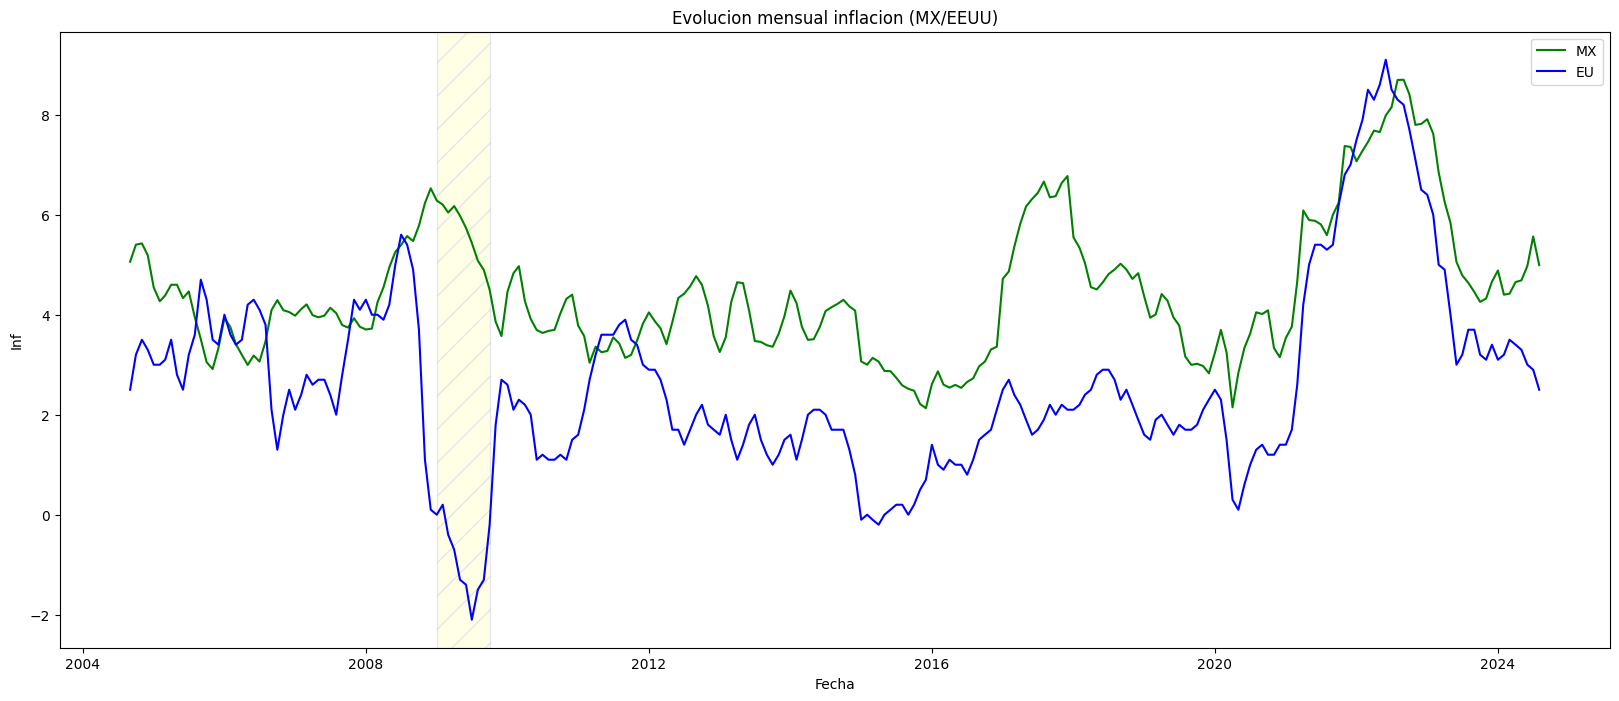

In [30]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'green')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')

plt.axvspan(datetime(2009, 1, 1), datetime(2009, 10, 1), facecolor='yellow', alpha=0.1, hatch='/', edgecolor='blue', linewidth=1)

plt.legend()
plt.show()

De primera instancia, podemos apreciar los niveles de inflacion en México vs EEUU se mueven en un mismo sentido, sin embargo, en México son más altos. Es en los últimos 4 años que se ha dado una mayor paridad en el indicador. Se aprecia que para México existe una mayor **volatilidad**. 


In [31]:
inf_cruz.describe()

,INF_MX,INF_EU
count,240.000000,240.000000
mean,4.457330,2.597500
std,1.356535,1.944823
min,2.130813,-2.100000
25%,3.506589,1.500000
50%,4.193345,2.200000
75%,5.023533,3.500000
max,8.699750,9.100000
